In [83]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


# NAme: Sahil Khune
#roll No:52

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Basic EDA of Image DataSet

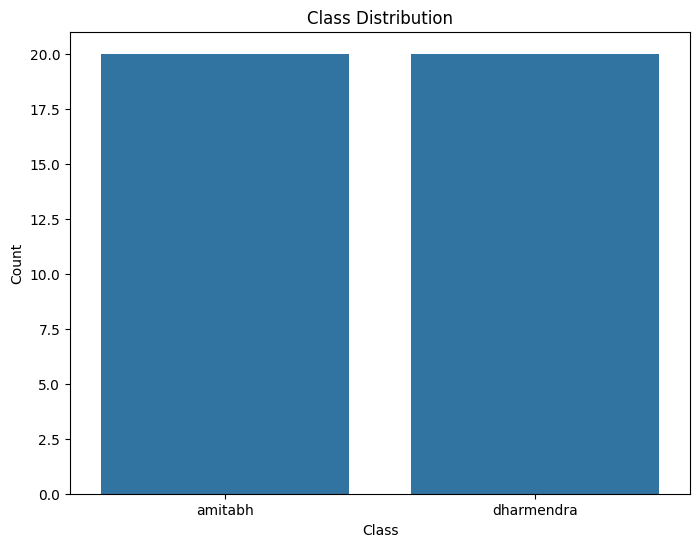

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img

# Define directories
train_dir = '/content/drive/MyDrive/actor/Train'
test_dir = '/content/drive/MyDrive/actor/Test'
val_dir = '/content/drive/MyDrive/actor/Validation'

# Function to plot class distribution
def plot_class_distribution(directory):
    class_counts = {}
    for subdir in os.listdir(directory):
        class_counts[subdir] = len(os.listdir(os.path.join(directory, subdir)))
    plt.figure(figsize=(8, 6))
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
    plt.title("Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()

# Plot class distribution for training data
plot_class_distribution(train_dir)



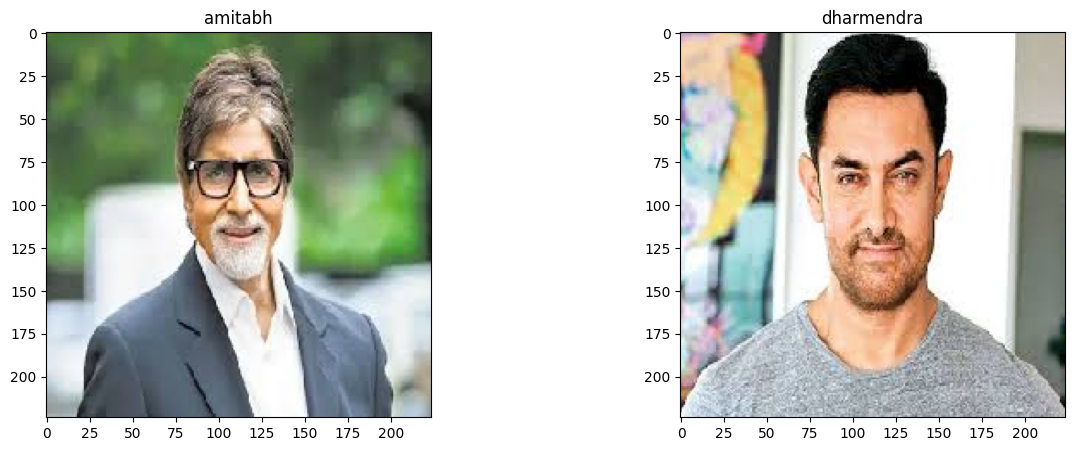

In [87]:
def display_sample_images(directory, num_images=2):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, subdir in enumerate(os.listdir(directory)[:num_images]):
        img_file = os.listdir(os.path.join(directory, subdir))[0]
        img_path = os.path.join(directory, subdir, img_file)
        img = load_img(img_path, target_size=(224, 224))
        axes[i].imshow(img)
        axes[i].set_title(subdir)
        # axes[i].axis('off')
    plt.show()

# Display sample images from training data
display_sample_images(train_dir)

In [ ]:
#Concatenate
X=np.concatenate((train_amitabh,train_dharmendra))
y=np.concatenate((train_amitabh_label,train_dharmendra_label))
y_label =to_categorical(y)
#Train -Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.33, random_state=42,shuffle=True)
#Normalize the data
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train=X_train/255
X_test=X_test/255
print("Training Data",X_train.shape)
print("Testing Data",X_test.shape)

Training Data (46, 64, 64, 3)
Testing Data (23, 64, 64, 3)


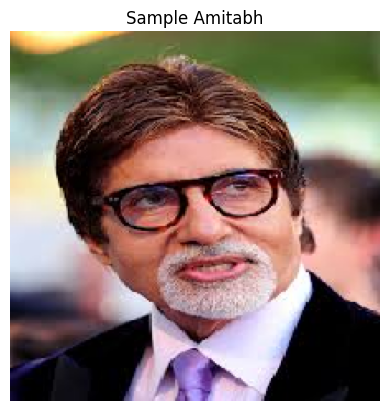

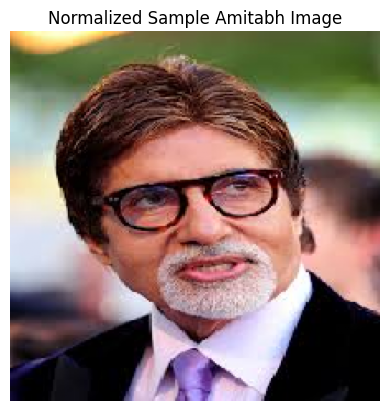

In [41]:
# Preprocessing: Resize and visualize an image
img = load_img('/content/drive/MyDrive/actor/amitabh/a1.jpg', target_size=(224, 224))
plt.imshow(img)
plt.title("Sample Amitabh")
plt.axis('off')
plt.show()

# Preprocessing: Normalize pixel values
img_array = np.array(img) / 255.0
plt.imshow(img_array)
plt.title("Normalized Sample Amitabh Image")
plt.axis('off')
plt.show()

In [88]:
train_dir = '/content/drive/MyDrive/actor/Train'
test_dir = '/content/drive/MyDrive/actor/Test'
val_dir = '/content/drive/MyDrive/actor/Validation'

# Preprocessing and data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')


Found 40 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


#Model Building

###VGG MODEL

In [89]:
def create_vgg_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False
    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Add dropout layer
        Dense(1, activation='sigmoid')
    ])
    return model

In [91]:
# Compile and train the models
vgg_model = create_vgg_model()
vgg_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
vgg_history = vgg_model.fit(train_generator, epochs=15, validation_data=validation_generator)

Epoch 1/15
2/2 [==============================] - ETA: 0s - loss: 1.3788 - accuracy: 0.4250

2/2 [==============================] - 2s 671ms/step - loss: 1.3788 - accuracy: 0.4250 - val_loss: 5.4566 - val_accuracy: 0.5000
Epoch 2/15
2/2 [==============================] - 1s 159ms/step - loss: 4.3341 - accuracy: 0.5000 - val_loss: 2.1404 - val_accuracy: 0.5000
Epoch 3/15
2/2 [==============================] - 1s 657ms/step - loss: 4.0241 - accuracy: 0.5250 - val_loss: 3.7490 - val_accuracy: 0.5000
Epoch 4/15
2/2 [==============================] - 1s 211ms/step - loss: 2.7894 - accuracy: 0.5250 - val_loss: 0.2299 - val_accuracy: 0.8333
Epoch 5/15
2/2 [==============================] - 2s 2s/step - loss: 0.8466 - accuracy: 0.8250 - val_loss: 2.2456 - val_accuracy: 0.5000
Epoch 6/15
2/2 [==============================] - 1s 601ms/step - loss: 2.0814 - accuracy: 0.6250 - val_loss: 1.9729 - val_accuracy: 0.5000
Epoch 7/15
2/2 [==============================] - 1s 237ms/step - loss: 1.9194 - accuracy: 0.7250 - val_loss: 0.1423 - val_accuracy: 1.0000
Epoch 8/15
2/2 [==================

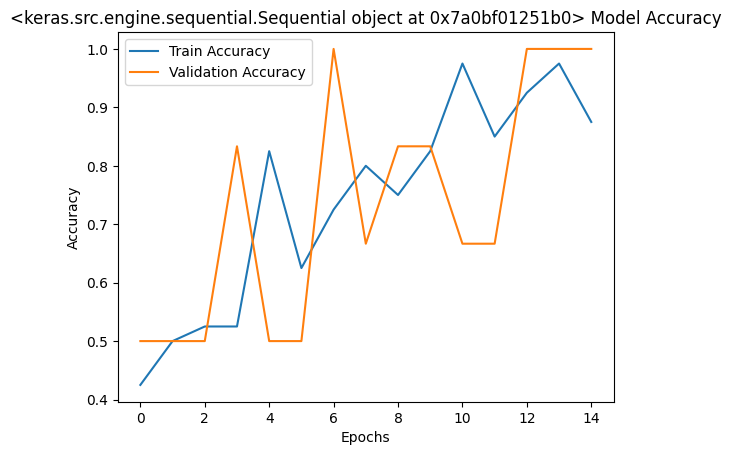

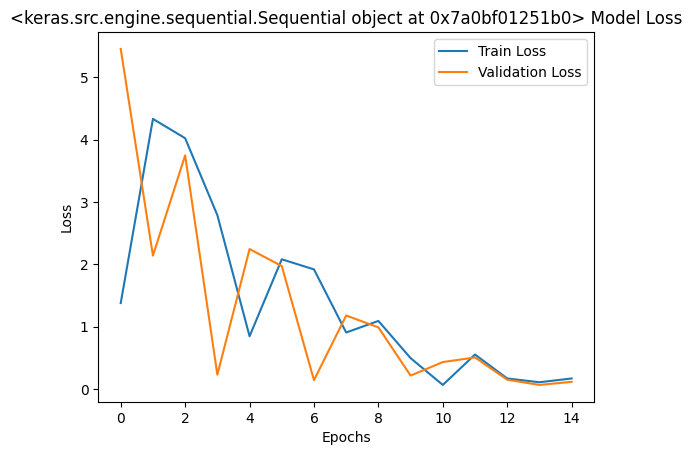

In [92]:
def plot_training_history(history, model_name):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{vgg_model} Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{vgg_model} Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(vgg_history, vgg_model)

##RESNET MODEL

In [93]:
def create_resnet_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False
    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Add dropout layer
        Dense(1, activation='sigmoid')
    ])
    return model


In [95]:
import tensorflow as tf
from tensorflow.keras import layers, Model

# Define the ResNet block
def resnet_block(x, filters, kernel_size=3, strides=1, activation='relu'):
    y = layers.Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same')(x)
    y = layers.BatchNormalization()(y)
    y = layers.Activation(activation)(y)
    y = layers.Conv2D(filters, kernel_size=kernel_size, padding='same')(y)
    y = layers.BatchNormalization()(y)

    # Shortcut connection
    if strides != 1 or x.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, kernel_size=1, strides=strides, padding='same')(x)
        shortcut = layers.BatchNormalization()(shortcut)
    else:
        shortcut = x

    # Merge
    y = layers.add([y, shortcut])
    y = layers.Activation(activation)(y)
    return y

# Build ResNet model
def build_resnet(input_shape, num_classes):
    input = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, 7, strides=2, padding='same')(input)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Stack residual blocks
    x = resnet_block(x, 64)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 128)
    x = resnet_block(x, 256, strides=2)
    x = resnet_block(x, 256)
    x = resnet_block(x, 512, strides=2)
    x = resnet_block(x, 512)

    # Global average pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Fully connected layer
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input, outputs=x)
    return model

# Define input shape and number of classes
input_shape = (256, 256, 3)  # Adjust this according to your dataset
num_classes = 2  # Assuming binary classification

# Build the ResNet model
model_resnet = build_resnet(input_shape, num_classes)

# Compile the model
model_resnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [96]:
# Print model summary
model_resnet.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_17 (InputLayer)       [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_49 (Conv2D)          (None, 128, 128, 64)         9472      ['input_17[0][0]']            
                                                                                                  
 batch_normalization_40 (Ba  (None, 128, 128, 64)         256       ['conv2d_49[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_34 (Activation)  (None, 128, 128, 64)         0         ['batch_normalization_40

In [97]:
resnet_model = create_resnet_model()
resnet_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
resnet_history = resnet_model.fit(train_generator, epochs=15, validation_data=validation_generator)

Epoch 1/15
2/2 [==============================] - 7s 3s/step - loss: 1.9002 - accuracy: 0.5000 - val_loss: 16.7127 - val_accuracy: 0.5000
Epoch 2/15
2/2 [==============================] - 1s 844ms/step - loss: 15.8721 - accuracy: 0.5000 - val_loss: 3.4089 - val_accuracy: 0.5000
Epoch 3/15
2/2 [==============================] - 1s 610ms/step - loss: 8.5707 - accuracy: 0.5250 - val_loss: 12.5973 - val_accuracy: 0.5000
Epoch 4/15
2/2 [==============================] - 1s 606ms/step - loss: 10.8774 - accuracy: 0.5250 - val_loss: 4.8828 - val_accuracy: 0.5000
Epoch 5/15
2/2 [==============================] - 1s 591ms/step - loss: 8.0290 - accuracy: 0.4000 - val_loss: 6.9282 - val_accuracy: 0.5000
Epoch 6/15
2/2 [==============================] - 1s 171ms/step - loss: 7.6103 - accuracy: 0.5000 - val_loss: 5.6998 - val_accuracy: 0.5000
Epoch 7/15
2/2 [==============================] - 1s 678ms/step - loss: 4.5116 - accuracy: 0.5500 - val_loss: 1.4750 - val_accuracy: 0.5000
Epoch 8/15
2/2 [===

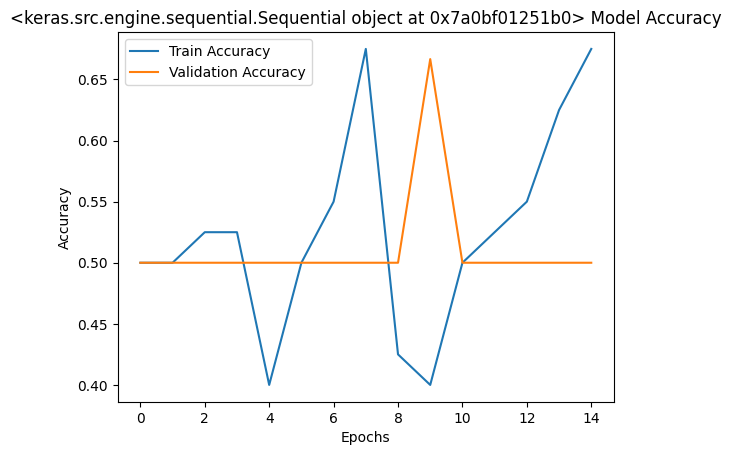

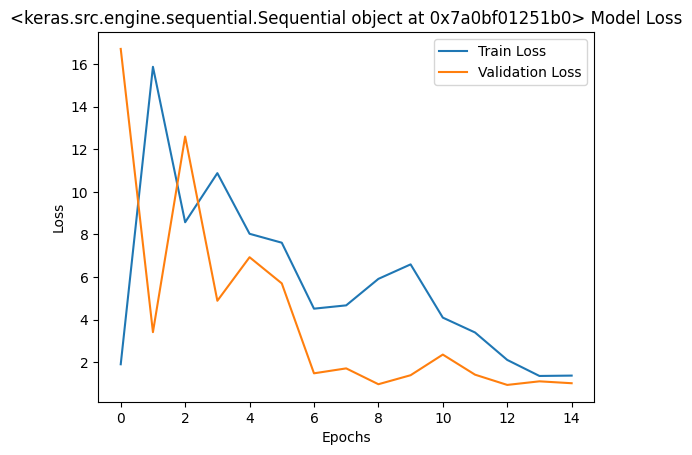

In [98]:
def plot_training_history(history, model_name):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{vgg_model} Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{vgg_model} Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(resnet_history, resnet_model)

###MOBILNET MODEL

In [99]:
import tensorflow as tf
from tensorflow.keras import layers, Model

# Build MobileNetV2 model
def build_mobilenet(input_shape, num_classes):
    base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape,
                                                   include_top=False,
                                                   weights='imagenet')

    # Freeze the convolutional base
    base_model.trainable = False

    # Add classification head
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    return model

# Define input shape and number of classes
input_shape = (256, 256, 3)
num_classes = 2

# Build the MobileNetV2 model
model_mobilenet = build_mobilenet(input_shape, num_classes)

# Compile the model
model_mobilenet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [100]:
# Print model summary
model_mobilenet.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_19 (InputLayer)       [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 128, 128, 32)         864       ['input_19[0][0]']            
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 128, 128, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 128, 128, 32)         0         ['bn_Conv1[0][0]']      

In [101]:
mobilenet_model = create_mobilenet_model()
mobilenet_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
mobilenet_history = mobilenet_model.fit(train_generator, epochs=15, validation_data=validation_generator)

Epoch 1/15
2/2 [==============================] - 4s 2s/step - loss: 3.1837 - accuracy: 0.3500 - val_loss: 2.7365 - val_accuracy: 0.8333
Epoch 2/15
2/2 [==============================] - 1s 175ms/step - loss: 0.8284 - accuracy: 0.8750 - val_loss: 1.7822 - val_accuracy: 0.8333
Epoch 3/15
2/2 [==============================] - 1s 564ms/step - loss: 0.6130 - accuracy: 0.9000 - val_loss: 2.8384 - val_accuracy: 0.8333
Epoch 4/15
2/2 [==============================] - 1s 391ms/step - loss: 1.3373 - accuracy: 0.9750 - val_loss: 1.7119 - val_accuracy: 0.6667
Epoch 5/15
2/2 [==============================] - 1s 176ms/step - loss: 0.8705 - accuracy: 0.9250 - val_loss: 1.8148 - val_accuracy: 0.6667
Epoch 6/15
2/2 [==============================] - 1s 172ms/step - loss: 1.0674 - accuracy: 0.9500 - val_loss: 2.2295 - val_accuracy: 0.8333
Epoch 7/15
2/2 [==============================] - 1s 183ms/step - loss: 0.2041 - accuracy: 0.9750 - val_loss: 5.0747 - val_accuracy: 0.8333
Epoch 8/15
2/2 [=======

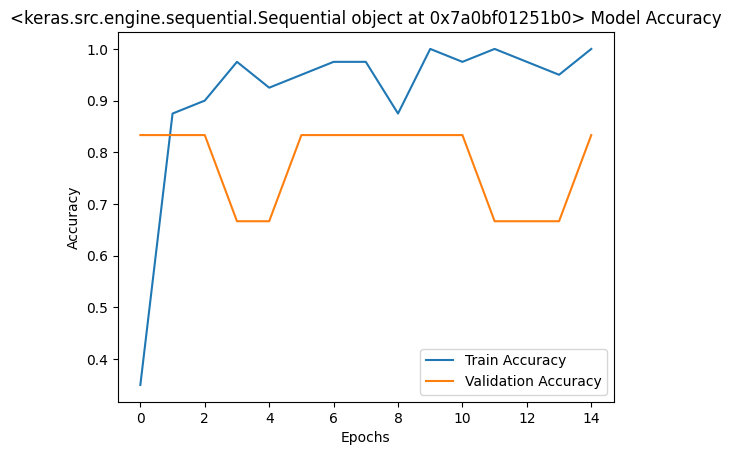

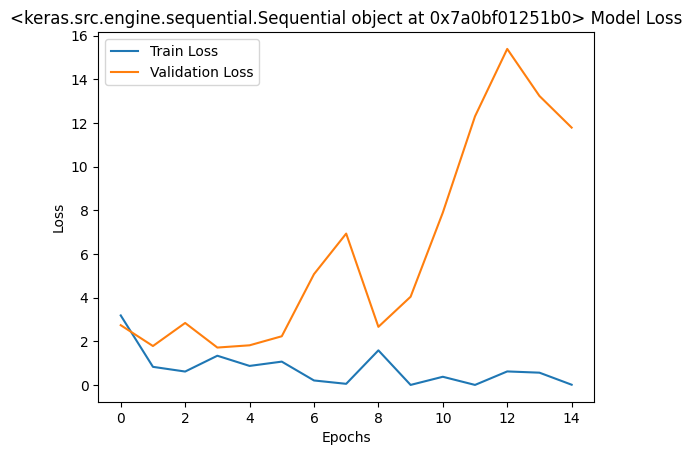

In [102]:
def plot_training_history(history, model_name):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{vgg_model} Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{vgg_model} Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(mobilenet_history, mobilenet_model)

###Evaluating and Comparing the performance of the models

1/1 [==============================] - 0s 130ms/step - loss: 24.2093 - accuracy: 0.7500
VGG Model Test Accuracy: 0.625
ResNet Model Test Accuracy: 0.5
MobileNet Model Test Accuracy: 0.75


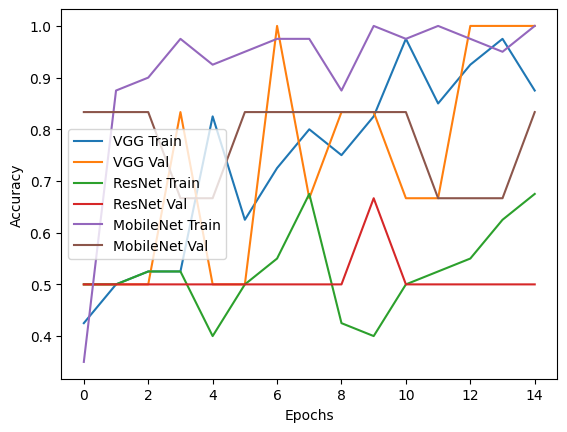

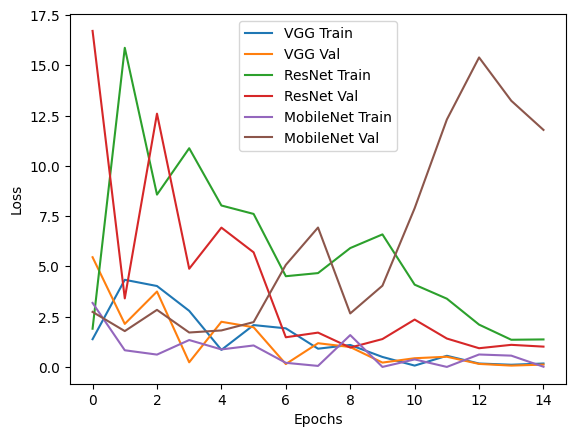

In [103]:
# Evaluate the models on the test set
vgg_scores = vgg_model.evaluate(test_generator)
resnet_scores = resnet_model.evaluate(test_generator)
mobilenet_scores = mobilenet_model.evaluate(test_generator)

print("VGG Model Test Accuracy:", vgg_scores[1])
print("ResNet Model Test Accuracy:", resnet_scores[1])
print("MobileNet Model Test Accuracy:", mobilenet_scores[1])

# Plot training and validation accuracy
plt.plot(vgg_history.history['accuracy'], label='VGG Train')
plt.plot(vgg_history.history['val_accuracy'], label='VGG Val')
plt.plot(resnet_history.history['accuracy'], label='ResNet Train')
plt.plot(resnet_history.history['val_accuracy'], label='ResNet Val')
plt.plot(mobilenet_history.history['accuracy'], label='MobileNet Train')
plt.plot(mobilenet_history.history['val_accuracy'], label='MobileNet Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(vgg_history.history['loss'], label='VGG Train')
plt.plot(vgg_history.history['val_loss'], label='VGG Val')
plt.plot(resnet_history.history['loss'], label='ResNet Train')
plt.plot(resnet_history.history['val_loss'], label='ResNet Val')
plt.plot(mobilenet_history.history['loss'], label='MobileNet Train')
plt.plot(mobilenet_history.history['val_loss'], label='MobileNet Val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# saving

In [104]:
# model.save("/content/drive/MyDrive/dataset/BirdDroneDataset/birdvsdrone.h5")
vgg_model.save("/content/drive/MyDrive/actor/actor_vgg.h5")
resnet_model.save("/content/drive/MyDrive/actor/actor_resnet.h5")
mobilenet_model.save("/content/drive/MyDrive/actor/actor_mobilenet.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# model testing

In [105]:
def predict_image(model, img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    prediction = model.predict(img_array)
    if prediction[0] < 0.5:
        print("Predicted class: amitabh")
    else:
        print("Predicted class: Dharmendra")

# Test images paths
test_images = ['/content/drive/MyDrive/actor/amitabh/a1.jpg', '/content/drive/MyDrive/actor/dharmendra/b1.jpg']  # Replace with your test image paths

# Test the images with each model
for model, model_name in zip([vgg_model, resnet_model, mobilenet_model], ['VGG', 'ResNet', 'MobileNet']):
    print(f"Predictions using {model_name} model:")
    for img_path in test_images:
        print(f"Image: {img_path}")
        predict_image(model, img_path)
        print()


Predictions using VGG model:
Image: /content/drive/MyDrive/actor/amitabh/a1.jpg
1/1 [==============================] - 1s 1s/step
Predicted class: amitabh

Image: /content/drive/MyDrive/actor/dharmendra/b1.jpg
1/1 [==============================] - 0s 20ms/step
Predicted class: Dharmendra

Predictions using ResNet model:
Image: /content/drive/MyDrive/actor/amitabh/a1.jpg
1/1 [==============================] - 2s 2s/step
Predicted class: amitabh

Image: /content/drive/MyDrive/actor/dharmendra/b1.jpg
1/1 [==============================] - 0s 42ms/step
Predicted class: Dharmendra

Predictions using MobileNet model:
Image: /content/drive/MyDrive/actor/amitabh/a1.jpg
1/1 [==============================] - 2s 2s/step
Predicted class: amitabh

Image: /content/drive/MyDrive/actor/dharmendra/b1.jpg
1/1 [==============================] - 0s 20ms/step
Predicted class: Dharmendra

